# Random Forest - Black Box
This code shows the implementation of Random Forest as a Black Box


## Imports
import the necessary libraries from sklearn, matplotlib and numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Function to create a mesh

In [2]:
def make_mesh(X):
    h =  0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    return xx,yy

run inference on mesh

In [3]:
def run_mesh(xx,yy,clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

## Plot Decision Regions

In [4]:
def Decision_Regions(X,clf,X_train,y_train,X_test,y_test,score):
    xx,yy = make_mesh(X)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    figure = plt.figure(figsize=(18,8))
    ax = plt.subplot(1, 2, 1)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    #Show the test accuracy (score)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    plt.tight_layout()
    plt.show()

## Initialize
Initialize the Colour Maps for the plots, set the random seed and the step size of the mesh

In [5]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
np.random.seed(100)

## Create the make_moons Dataset
Create the make moons dataset while adding some noise

In [6]:
X,y=make_moons(noise=0.05, random_state=1)

Normalize and Split the data into Train and Test sets

In [7]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

## Fit the Random Forest Classifier
Fit the model on the train set

In [8]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Run inference on the test data

In [9]:
score = clf.score(X_test, y_test)

## Plot the Decision Regions and the data points

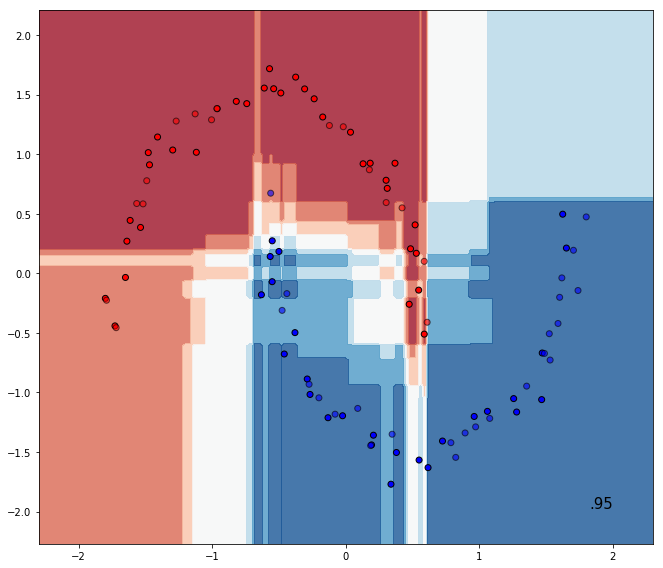

In [10]:
Decision_Regions(X,clf,X_train,y_train,X_test,y_test,score)